In [1]:
import tensorflow as tf

2022-12-12 06:34:36.092808: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.__version__

'2.9.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions



In [4]:
path = './pneumonia_detection/data/data_xray/train/NORMAL'
name = 'IM-0115-0001.jpeg'
fullname = f'{path}/{name}'
fullname

'./pneumonia_detection/data/data_xray/train/NORMAL/IM-0115-0001.jpeg'

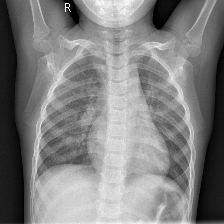

In [5]:
img = load_img(fullname,target_size=(224,224))
img

In [6]:
x = np.array(img)
x.shape


(224, 224, 3)

## Pre-trained conv nets

In [7]:
model = MobileNetV2(weights='imagenet',input_shape=(224,224,3))


2022-12-12 06:34:43.831976: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 06:34:43.911811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 06:34:43.912465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-12 06:34:43.913443: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [8]:
X = np.array([x]) # since this model expects multiple images, we create an array
X.shape # gives shape as (1,299,299,3) 1 since there is only 1 image

(1, 224, 224, 3)

In [9]:
X = preprocess_input(X) #scales input btw -1 and 1

In [10]:
pred = model.predict(X)
pred.shape


2022-12-12 06:34:48.072469: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-12 06:34:50.143709: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 06:34:50.144571: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 06:34:50.144611: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-12 06:34:50.145612: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-12 06:34:50.145698: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 6s 6s/step


(1, 1000)

In [11]:
decode_predictions(pred)

[[('n04560804', 'water_jug', 0.035006445),
  ('n01990800', 'isopod', 0.03247456),
  ('n04040759', 'radiator', 0.031395722),
  ('n01768244', 'trilobite', 0.02847459),
  ('n03670208', 'limousine', 0.021446398)]]

## TRANSFER LEARNING

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen =ImageDataGenerator(preprocessing_function = preprocess_input)

In [14]:
train_ds = train_gen.flow_from_directory('./pneumonia_detection/data/data_xray/train',
                              target_size=(150,150),
                             batch_size = 32
                             )
#making images smaller , 150 x 150 so that training is faster.

Found 5216 images belonging to 2 classes.


In [15]:
#shape of the batch is : (32,150,150,150,3) so 32 vectors will be produced.

In [16]:
!ls -l pneumonia_detection/data/data_xray/train

total 272
drwxrwsr-x 2 jovyan jovyan  69632 Dec 11 16:27 NORMAL
drwxrwsr-x 2 jovyan jovyan 208896 Dec 11 16:27 PNEUMONIA


In [17]:
train_ds.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
X,y = next(train_ds) # returns next batch of x and y i.e, features of images and y labels.

In [19]:
X

array([[[[-0.9372549 , -0.9372549 , -0.9372549 ],
         [-0.88235295, -0.88235295, -0.88235295],
         [-0.78039217, -0.78039217, -0.78039217],
         ...,
         [-0.4823529 , -0.4823529 , -0.4823529 ],
         [-0.5686275 , -0.5686275 , -0.5686275 ],
         [-0.62352943, -0.62352943, -0.62352943]],

        [[-0.9764706 , -0.9764706 , -0.9764706 ],
         [-0.92941177, -0.92941177, -0.92941177],
         [-0.8352941 , -0.8352941 , -0.8352941 ],
         ...,
         [-0.4980392 , -0.4980392 , -0.4980392 ],
         [-0.56078434, -0.56078434, -0.56078434],
         [-0.60784316, -0.60784316, -0.60784316]],

        [[-0.99215686, -0.99215686, -0.99215686],
         [-0.94509804, -0.94509804, -0.94509804],
         [-0.85882354, -0.85882354, -0.85882354],
         ...,
         [-0.5058824 , -0.5058824 , -0.5058824 ],
         [-0.54509807, -0.54509807, -0.54509807],
         [-0.62352943, -0.62352943, -0.62352943]],

        ...,

        [[-1.        , -1.        , -1

In [20]:
X.shape

(32, 150, 150, 3)

In [21]:
y

# 10 classes are columns are hot encoded from 0 to 9, i.e --> 1 at column 9 means tshirt etc.

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [22]:
val_gen =ImageDataGenerator(preprocessing_function = preprocess_input)
val_ds = val_gen.flow_from_directory('./pneumonia_detection/data/data_xray/val',
                              target_size=(150,150),
                             batch_size = 32,shuffle = False
                             )
# we dont need to shuffle since it is for validating.

Found 16 images belonging to 2 classes.


## Training the model

In [23]:
base_model = MobileNetV2(weights='imagenet' , include_top = False,input_shape=(150, 150, 3)) 
# dense layers are at the top. they wont be included.
base_model.trainable = False # freezes conv lahyers

In [24]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(2)(vectors)

model = keras.Model(inputs, outputs)

In [25]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
163/163 [==============================] - 62s 363ms/step - loss: 0.2780 - accuracy: 0.9306 - val_loss: 0.9773 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 52s 318ms/step - loss: 0.1224 - accuracy: 0.9611 - val_loss: 1.1316 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0917 - accuracy: 0.9709 - val_loss: 0.7258 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0892 - accuracy: 0.9712 - val_loss: 1.3999 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 51s 316ms/step - loss: 0.0672 - accuracy: 0.9764 - val_loss: 0.3250 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 52s 316ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.1396 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 51s 315ms/step - loss: 0.0737 - accuracy: 0.9789 - val_loss: 2.2904 - val_ac

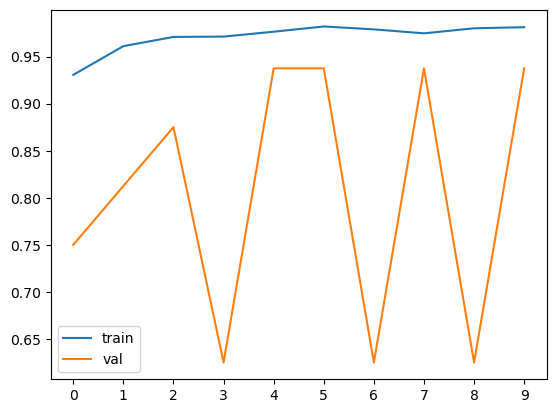

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()


## Adjusting the learning rate

In [28]:

def make_model(learning_rate=0.01):
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(2)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model


In [29]:
scores = {}

for lr in [0.0001, 0.005, 0.001, 0.05, 0.01, 0.5, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()


0.0001
Epoch 1/10
163/163 [==============================] - 54s 320ms/step - loss: 0.5085 - accuracy: 0.7548 - val_loss: 0.5294 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 51s 313ms/step - loss: 0.2630 - accuracy: 0.8923 - val_loss: 0.5053 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 51s 313ms/step - loss: 0.1998 - accuracy: 0.9206 - val_loss: 0.4880 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 51s 312ms/step - loss: 0.1684 - accuracy: 0.9377 - val_loss: 0.5296 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 51s 312ms/step - loss: 0.1491 - accuracy: 0.9469 - val_loss: 0.4492 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 51s 313ms/step - loss: 0.1357 - accuracy: 0.9523 - val_loss: 0.4947 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 51s 313ms/step - loss: 0.1264 - accuracy: 0.9561 - val_loss: 0.4545 -

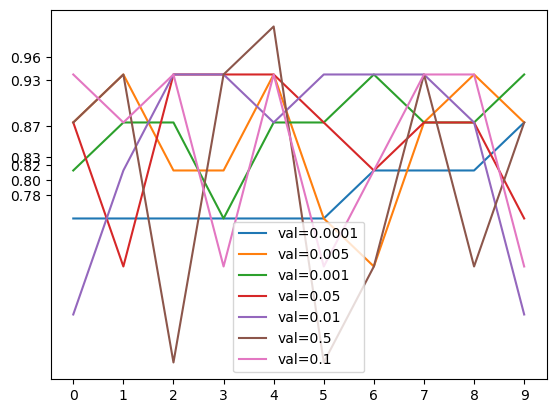

In [30]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.83, 0.87, 0.93, 0.96])
plt.legend()


In [31]:
### learning rates - 0.001 and 0.005 gives the best results

## Checkpointing

In [32]:
model.save_weights('model_v1.h5',save_format ='h5')

In [33]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'MobileNetV2_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [34]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)


Epoch 1/10
163/163 [==============================] - 55s 325ms/step - loss: 0.1593 - accuracy: 0.9392 - val_loss: 0.4144 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0971 - accuracy: 0.9682 - val_loss: 0.3727 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0812 - accuracy: 0.9707 - val_loss: 0.3739 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0688 - accuracy: 0.9757 - val_loss: 0.2597 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 52s 316ms/step - loss: 0.0622 - accuracy: 0.9762 - val_loss: 0.5774 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 52s 320ms/step - loss: 0.0575 - accuracy: 0.9791 - val_loss: 0.4977 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0517 - accuracy: 0.9803 - val_loss: 0.7280 - val_ac

## Adding more layers

In [35]:
def make_model(learning_rate=0.001, size_inner=100):
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(2)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [36]:
learning_rate = 0.001

scores = {}

for size in [10, 50, 100, 500, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()


10
Epoch 1/10
163/163 [==============================] - 55s 322ms/step - loss: 0.2018 - accuracy: 0.9206 - val_loss: 0.5288 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0972 - accuracy: 0.9632 - val_loss: 0.6170 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0793 - accuracy: 0.9695 - val_loss: 0.4737 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0659 - accuracy: 0.9785 - val_loss: 0.4928 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0580 - accuracy: 0.9787 - val_loss: 0.6343 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 52s 319ms/step - loss: 0.0518 - accuracy: 0.9814 - val_loss: 0.6268 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 52s 318ms/step - loss: 0.0521 - accuracy: 0.9803 - val_loss: 0.2695 - val

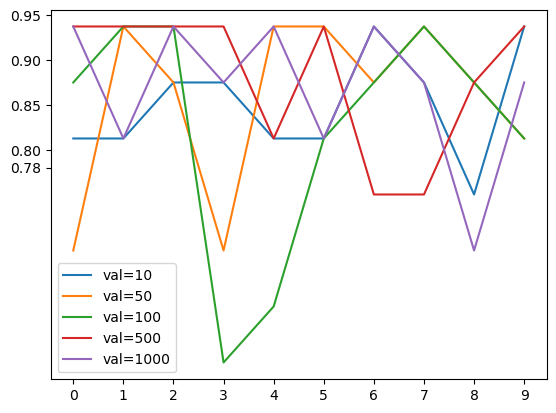

In [37]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.85, 0.90, 0.95])
plt.legend()

In [ ]:
# size = 500 for the inner layer seems to give the most stable graph

## Regularization and drop out

In [39]:
def make_model(learning_rate=0.001, size_inner=10, droprate=0.5):
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(2)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
learning_rate = 0.001
size = 500

scores = {}

for droprate in [0.0, 0.1, 0.3, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


0.0
Epoch 1/30
163/163 [==============================] - 55s 321ms/step - loss: 0.1969 - accuracy: 0.9379 - val_loss: 0.3786 - val_accuracy: 0.9375
Epoch 2/30
163/163 [==============================] - 52s 319ms/step - loss: 0.0875 - accuracy: 0.9670 - val_loss: 0.6439 - val_accuracy: 0.8125
Epoch 3/30
163/163 [==============================] - 52s 319ms/step - loss: 0.0671 - accuracy: 0.9753 - val_loss: 0.6490 - val_accuracy: 0.8125
Epoch 4/30
163/163 [==============================] - 51s 316ms/step - loss: 0.0651 - accuracy: 0.9730 - val_loss: 0.5157 - val_accuracy: 0.9375
Epoch 5/30
163/163 [==============================] - 52s 317ms/step - loss: 0.0477 - accuracy: 0.9818 - val_loss: 0.5254 - val_accuracy: 0.9375
Epoch 6/30
163/163 [==============================] - 52s 317ms/step - loss: 0.0379 - accuracy: 0.9868 - val_loss: 1.2764 - val_accuracy: 0.6250
Epoch 7/30
163/163 [==============================] - 52s 319ms/step - loss: 0.0331 - accuracy: 0.9873 - val_loss: 0.6730 - va

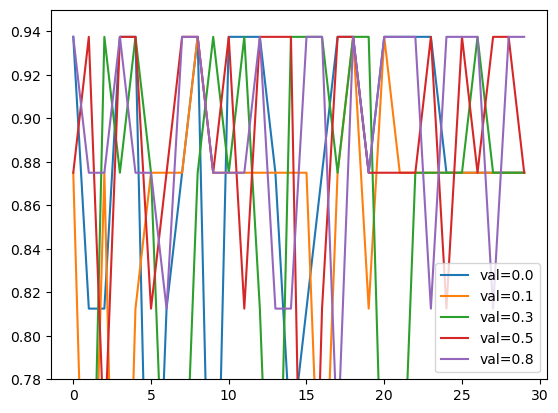

In [41]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.95)
plt.legend()


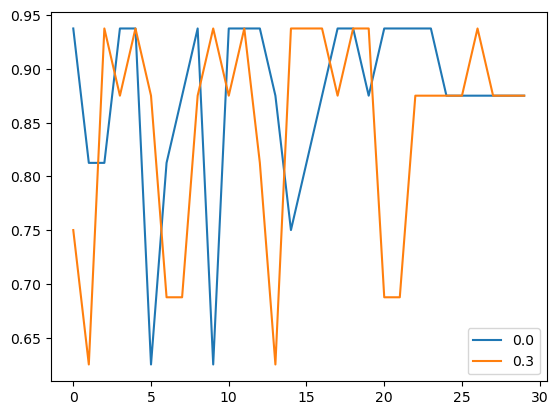

In [42]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.3]
plt.plot(hist['val_accuracy'], label=0.3)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation

In [44]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './pneumonia_detection/data/data_xray/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './pneumonia_detection/data/data_xray/val',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [45]:
learning_rate = 0.001
size = 500
droprate = 0.3
# best tuned parameters
model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=15, validation_data=val_ds)


Epoch 1/15
163/163 [==============================] - 54s 320ms/step - loss: 0.1893 - accuracy: 0.9367 - val_loss: 0.6422 - val_accuracy: 0.8125
Epoch 2/15
163/163 [==============================] - 51s 315ms/step - loss: 0.0973 - accuracy: 0.9640 - val_loss: 0.6931 - val_accuracy: 0.8750
Epoch 3/15
163/163 [==============================] - 51s 316ms/step - loss: 0.0804 - accuracy: 0.9688 - val_loss: 0.6975 - val_accuracy: 0.8125
Epoch 4/15
163/163 [==============================] - 52s 317ms/step - loss: 0.0708 - accuracy: 0.9730 - val_loss: 0.4426 - val_accuracy: 0.8750
Epoch 5/15
163/163 [==============================] - 52s 317ms/step - loss: 0.0620 - accuracy: 0.9766 - val_loss: 0.4823 - val_accuracy: 0.8750
Epoch 6/15
163/163 [==============================] - 52s 318ms/step - loss: 0.0590 - accuracy: 0.9762 - val_loss: 0.8077 - val_accuracy: 0.6250
Epoch 7/15
163/163 [==============================] - 52s 316ms/step - loss: 0.0509 - accuracy: 0.9806 - val_loss: 0.4460 - val_ac

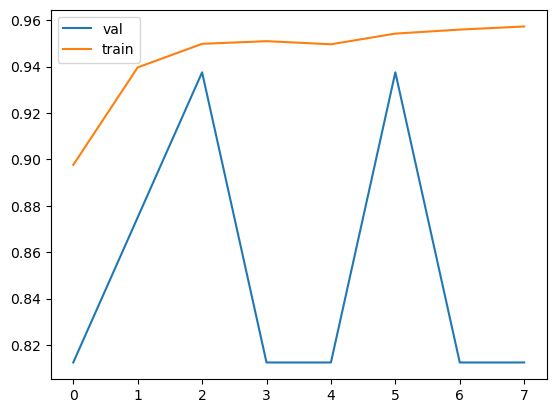

In [54]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [55]:
## Training the final model

In [61]:
def make_model(input_size=150, learning_rate=0.001, size_inner=500,
               droprate=0.8):

    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    outputs = keras.layers.Dense(2)(vectors)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [62]:
input_size = 224


In [63]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './pneumonia_detection/data/data_xray/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './pneumonia_detection/data/data_xray/val',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [64]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'MobileNetV2_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


In [65]:
learning_rate = 0.001
size = 500
droprate = 0.8

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=8, validation_data=val_ds,
                   callbacks=[checkpoint])


Epoch 1/8
163/163 [==============================] - 102s 610ms/step - loss: 0.2575 - accuracy: 0.9030 - val_loss: 0.2485 - val_accuracy: 0.9375
Epoch 2/8
163/163 [==============================] - 98s 604ms/step - loss: 0.1222 - accuracy: 0.9563 - val_loss: 0.2417 - val_accuracy: 0.9375
Epoch 3/8
163/163 [==============================] - 99s 607ms/step - loss: 0.0972 - accuracy: 0.9657 - val_loss: 0.3005 - val_accuracy: 0.8125
Epoch 4/8
163/163 [==============================] - 98s 604ms/step - loss: 0.0891 - accuracy: 0.9655 - val_loss: 0.1486 - val_accuracy: 0.9375
Epoch 5/8
163/163 [==============================] - 99s 609ms/step - loss: 0.0819 - accuracy: 0.9716 - val_loss: 0.3019 - val_accuracy: 0.8750
Epoch 6/8
163/163 [==============================] - 99s 605ms/step - loss: 0.0812 - accuracy: 0.9689 - val_loss: 0.6886 - val_accuracy: 0.8125
Epoch 7/8
163/163 [==============================] - 99s 605ms/step - loss: 0.0720 - accuracy: 0.9755 - val_loss: 0.2116 - val_accuracy

## Using the model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './pneumonia_detection/data/data_xray/test',
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('MobileNetV2_v4_1_07_0.938.h5')


In [ ]:
model.evaluate(test_ds)

In [ ]:
path = 'pneumonia_detection/data/data_xray/test/PNEUMONIA/person100_bacteria_475.jpeg.jpg'


In [ ]:
img = load_img(path, target_size=(224, 224))


In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
X = preprocess_input(X)


In [ ]:
pred = model.predict(X)

In [ ]:
classes = [
    'Normal',
    'Pneumonia'
]

In [ ]:
dict(zip(classes, pred[0]))